## # ELEVATE LABS AI/ML INTERNSHIP
## Task-6 by Harsimran singh
### Dated - 1 july 2025
## Iris Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
from sklearn.datasets import load_iris
data = load_iris()

In [11]:
X= data.data
y = data.target

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


params = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}

knn = KNeighborsClassifier()

# GridSearchCV setup
grid_search = GridSearchCV(knn, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print("Test Set Accuracy with Best Params:", test_accuracy)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9583333333333334
Test Set Accuracy with Best Params: 1.0


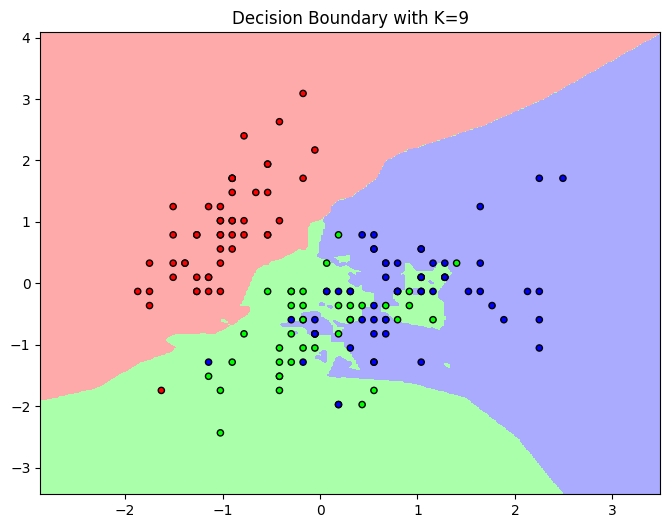

In [16]:
from matplotlib.colors import ListedColormap
import numpy as np


X_vis = X_scaled[:, :2]
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_v, y_train_v)


h = .02  
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title("Decision Boundary with K=9")
plt.show()
